In [1]:
import pandas as pd

# Load the datasets
adv_stats_path = "/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv"
betting_data_path = "/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv"

# Read in the data
team_adv = pd.read_csv(adv_stats_path)
betting = pd.read_csv(betting_data_path)

# Display first few rows to understand structure
team_adv.head(), betting.head()


(   Year                 TEAM  GP   W   L   MIN  OffRtg  DefRtg  NetRtg  \
 0  2003        Atlanta Hawks  82  35  47  3981   100.4   104.2    -3.8   
 1  2003       Boston Celtics  82  44  38  3966   100.0   100.5    -0.6   
 2  2003        Chicago Bulls  82  30  52  3985    99.1   104.2    -5.1   
 3  2003  Cleveland Cavaliers  82  17  65  3966    95.2   105.1    -9.9   
 4  2003     Dallas Mavericks  82  60  22  3956   109.3   101.0     8.3   
 
    AST_PCT  ...   AST  OREB_PCT  DREB_PCT  REB_PCT  TOV_PCT  eFG_PCT  TS_PCT  \
 0     58.7  ...  16.0      30.0      68.1     49.9     17.8     47.6    52.7   
 1     58.3  ...  15.5      26.6      69.1     47.4     15.1     47.0    51.4   
 2     59.6  ...  16.5      30.7      67.2     49.2     17.7     47.1    51.2   
 3     60.1  ...  15.7      33.8      69.7     51.3     19.1     44.4    49.1   
 4     58.1  ...  17.3      27.7      67.7     47.8     12.3     49.8    54.3   
 
     PACE   PIE    POSS  
 0  92.63  48.3  7,683   
 1  91.9

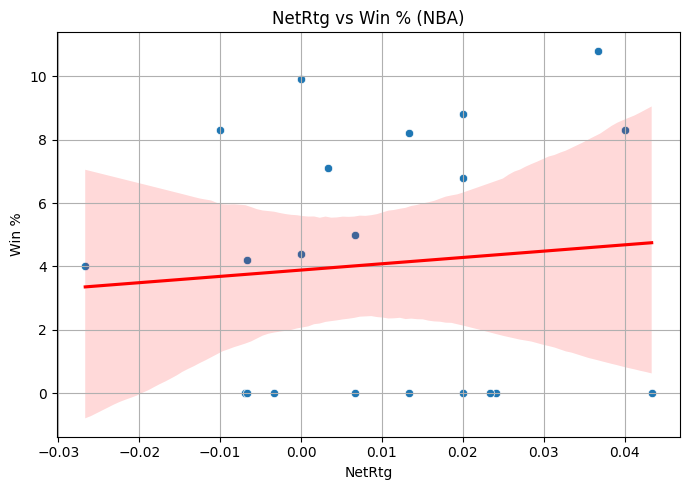

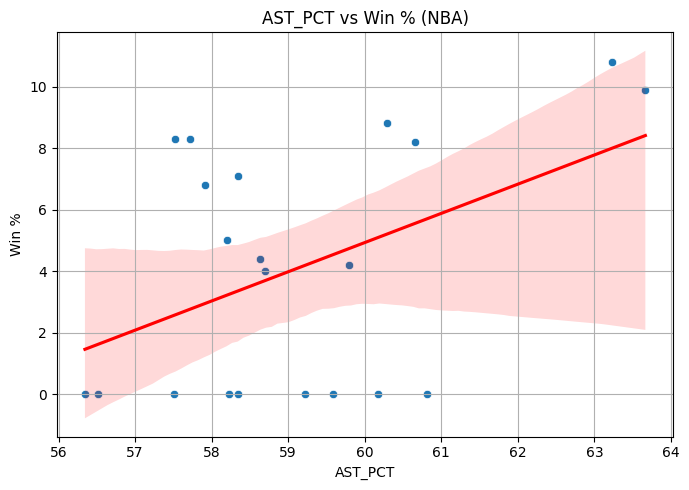

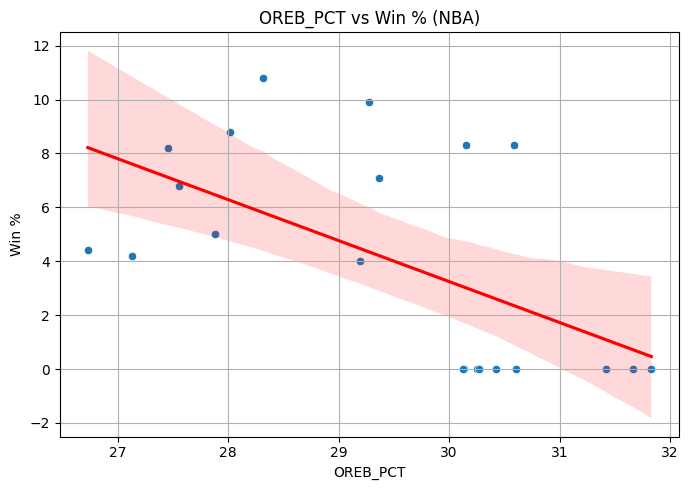

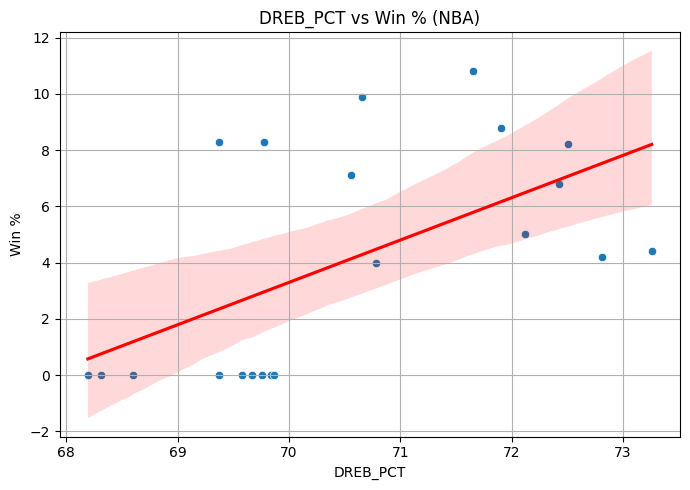

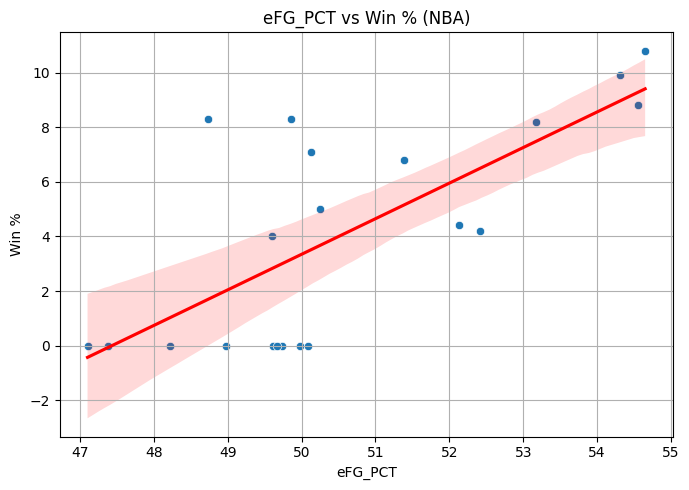

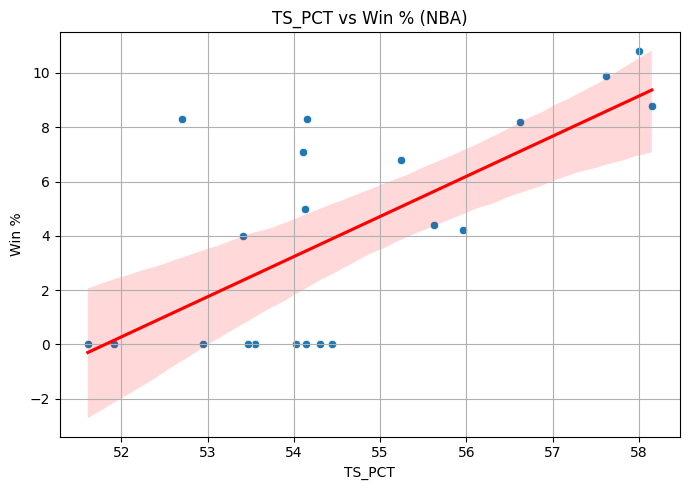

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Advanced Team Stats ===
team_stats = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv")
team_stats['Year'] = team_stats['Year'].astype(int)

# Clean 'POSS' if needed
team_stats['POSS'] = team_stats['POSS'].replace(',', '', regex=True).astype(float)

# Compute yearly league-wide averages
team_avg = team_stats.groupby('Year').mean(numeric_only=True).reset_index()

# === Load Betting Spread Data ===
spread_data = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv")

# Clean and convert necessary columns
spread_data = spread_data.dropna(subset=['Win_PCT', 'Cover_PCT', 'Average_MOV', 'Closing_Spread'])
spread_data['Win_PCT'] = spread_data['Win_PCT'].astype(float)
spread_data['Cover_PCT'] = spread_data['Cover_PCT'].astype(float)
spread_data['Average_MOV'] = spread_data['Average_MOV'].astype(float)

# === Visualize Correlation with Betting Metrics ===

# Select key performance stats
key_stats = ['NetRtg', 'AST_PCT', 'OREB_PCT', 'DREB_PCT', 'eFG_PCT', 'TS_PCT']

# Plot correlation between NetRtg and Win_PCT
for stat in key_stats:
    if stat in team_avg.columns:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=team_avg, x=stat, y=spread_data['Win_PCT'][:len(team_avg)])
        sns.regplot(data=team_avg, x=stat, y=spread_data['Win_PCT'][:len(team_avg)], scatter=False, color='red')
        plt.title(f"{stat} vs Win % (NBA)")
        plt.xlabel(stat)
        plt.ylabel("Win %")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd

# === Load the datasets ===
team_stats = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv")
spread_data = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv")

# === Clean and preprocess ===
team_stats['Year'] = team_stats['Year'].astype(int)
team_stats['POSS'] = team_stats['POSS'].replace(',', '', regex=True).astype(float)

# Aggregate team stats per year (league-wide averages)
team_avg = team_stats.groupby('Year').mean(numeric_only=True).reset_index()

# Prepare and clean spread data
spread_data = spread_data.dropna(subset=['Win_PCT', 'Cover_PCT', 'Average_MOV', 'Closing_Spread'])
spread_data['Win_PCT'] = spread_data['Win_PCT'].astype(float)
spread_data['Cover_PCT'] = spread_data['Cover_PCT'].astype(float)
spread_data['Average_MOV'] = spread_data['Average_MOV'].astype(float)

# === Compute correlation matrix ===
combined_df = team_avg.copy()
combined_df['Win_PCT'] = spread_data['Win_PCT'].values[:len(combined_df)]
combined_df['Cover_PCT'] = spread_data['Cover_PCT'].values[:len(combined_df)]
combined_df['Average_MOV'] = spread_data['Average_MOV'].values[:len(combined_df)]

# Only keep relevant columns for correlation
relevant_cols = ['NetRtg', 'AST_PCT', 'OREB_PCT', 'DREB_PCT', 'eFG_PCT', 'TS_PCT', 'Win_PCT', 'Cover_PCT', 'Average_MOV']
corr_matrix = combined_df[relevant_cols].corr()

# Print correlation matrix
print("\n🔢 Correlation Matrix:")
print(corr_matrix.round(3))

# Interpretation helpers
def interpret_correlation(var1, var2, corr_value):
    direction = "positive" if corr_value > 0 else "negative"
    strength = (
        "strong" if abs(corr_value) >= 0.7 else
        "moderate" if abs(corr_value) >= 0.4 else
        "weak"
    )
    return f"{var1} has a {strength} {direction} correlation with {var2} (r = {corr_value:.2f})."

# Interpret each stat vs betting outcomes
print("\n📈 Interpretations:")
for stat in ['NetRtg', 'AST_PCT', 'eFG_PCT', 'TS_PCT']:
    win_corr = corr_matrix.at[stat, 'Win_PCT']
    cover_corr = corr_matrix.at[stat, 'Cover_PCT']
    print(interpret_correlation(stat, 'Win_PCT', win_corr))
    print(interpret_correlation(stat, 'Cover_PCT', cover_corr))



🔢 Correlation Matrix:
             NetRtg  AST_PCT  OREB_PCT  DREB_PCT  eFG_PCT  TS_PCT  Win_PCT  \
NetRtg        1.000   -0.080     0.002    -0.001    0.202   0.274    0.089   
AST_PCT      -0.080    1.000    -0.174     0.168    0.521   0.495    0.450   
OREB_PCT      0.002   -0.174     1.000    -1.000   -0.773  -0.727   -0.582   
DREB_PCT     -0.001    0.168    -1.000     1.000    0.767   0.723    0.572   
eFG_PCT       0.202    0.521    -0.773     0.767    1.000   0.992    0.720   
TS_PCT        0.274    0.495    -0.727     0.723    0.992   1.000    0.682   
Win_PCT       0.089    0.450    -0.582     0.572    0.720   0.682    1.000   
Cover_PCT    -0.179    0.069     0.068    -0.062   -0.027  -0.025    0.056   
Average_MOV  -0.200    0.430    -0.232     0.233    0.300   0.277    0.419   

             Cover_PCT  Average_MOV  
NetRtg          -0.179       -0.200  
AST_PCT          0.069        0.430  
OREB_PCT         0.068       -0.232  
DREB_PCT        -0.062        0.233  
eFG_PC

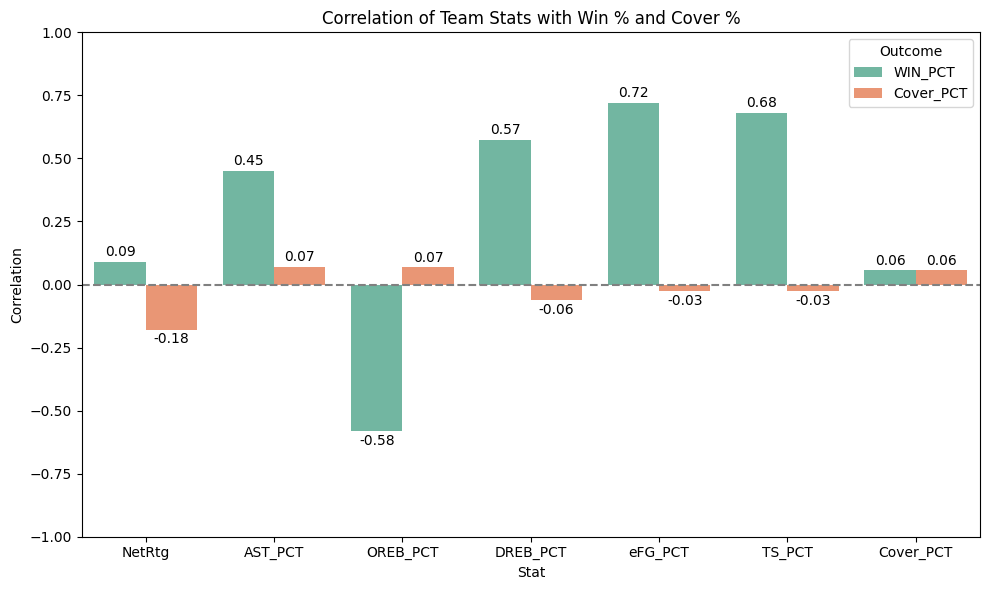

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean team stats
team_stats = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv")
spread_data = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv")

team_stats['Year'] = team_stats['Year'].astype(int)
team_stats['POSS'] = team_stats['POSS'].replace(',', '', regex=True).astype(float)
team_avg = team_stats.groupby('Year').mean(numeric_only=True).reset_index()

spread_data = spread_data.dropna(subset=['Win_PCT', 'Cover_PCT', 'Average_MOV', 'Closing_Spread'])
spread_data['Win_PCT'] = spread_data['Win_PCT'].astype(float)
spread_data['Cover_PCT'] = spread_data['Cover_PCT'].astype(float)
spread_data['Average_MOV'] = spread_data['Average_MOV'].astype(float)

combined_df = team_avg.copy()
combined_df['Win_PCT'] = spread_data['Win_PCT'].values[:len(combined_df)]
combined_df['Cover_PCT'] = spread_data['Cover_PCT'].values[:len(combined_df)]

relevant_cols = ['NetRtg', 'AST_PCT', 'OREB_PCT', 'DREB_PCT', 'eFG_PCT', 'TS_PCT', 'Win_PCT', 'Cover_PCT']
corr_matrix = combined_df[relevant_cols].corr()

cor_win = corr_matrix['Win_PCT'].drop('Win_PCT')
cor_cover = corr_matrix['Cover_PCT'].drop('Cover_PCT')

corr_df = pd.DataFrame({
    'Stat': cor_win.index.tolist() * 2,
    'Correlation': pd.concat([cor_win, cor_cover]).values,
    'Outcome': ['WIN_PCT'] * len(cor_win) + ['Cover_PCT'] * len(cor_cover)
})

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Stat', y='Correlation', hue='Outcome', data=corr_df, palette='Set2')

# Add text labels on top of bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)

plt.title('Correlation of Team Stats with Win % and Cover %')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
